In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz # uma das bibliotecas boas para praticar lógica difusa
import matplotlib.pyplot as plt

O pacote de excelência em Python para usar lógica difusa é skfuzzy

In [2]:
arange = np.arange(7,21,1) # apenas valores depois de 7
mat_raz = fuzz.trapmf(arange,[11,13,17,19]) # 0 até 11, sobe linearmente até 1 em 13, fica 1 até 17 e desce a 0 linearmente até 19, fica 0 até 20
fis_raz = fuzz.trapmf(arange,[11,13,17,19])
mat_bom = fuzz.trapmf(arange,[13,18,20,20])
fis_bom = fuzz.trapmf(arange,[13,18,20,20])

Agora seria interessante visualizar as nossas funções fuzzy do exemplo proposto nas aulas.

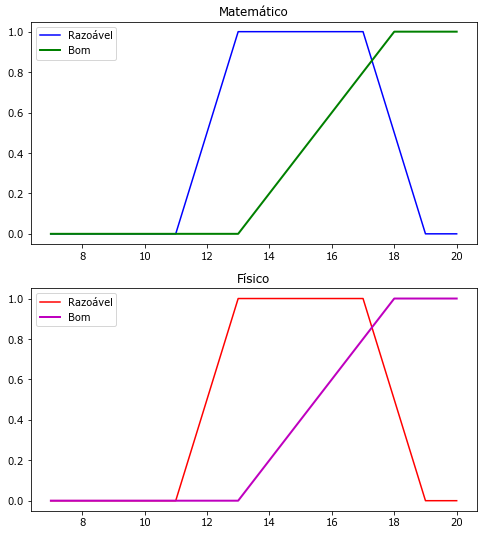

In [3]:
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8,9))

ax0.plot(arange, mat_raz, 'b', linewidth=1.5, label='Razoável')
ax0.plot(arange,mat_bom,'g',linewidth=2,label='Bom')
ax0.set_title('Matemático')
ax0.legend()

ax1.plot(arange, fis_raz, 'r', linewidth=1.5, label='Razoável')
ax1.plot(arange,fis_bom,'m',linewidth=2,label='Bom')
ax1.set_title('Físico')
ax1.legend()


Tendo em conta que, no nosso caso, temos apenas valores inteiros, devíamos apenas focar nesse pontos do gráfico.

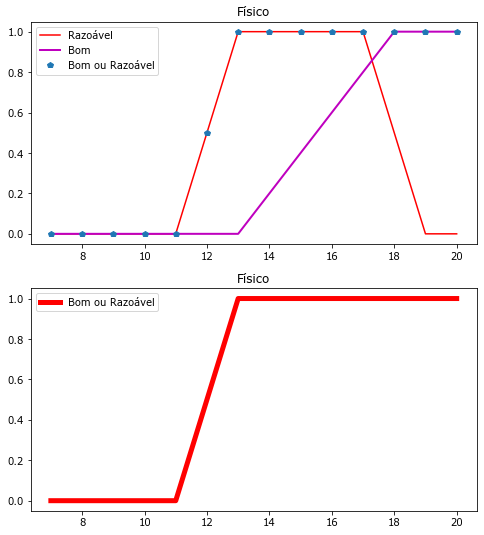

In [4]:
# fuzzy relations
raz_ou_bom_fis = fuzz.fuzzymath.fuzzy_or(arange,fis_raz,arange,fis_bom)

fig, (ax0,ax1) = plt.subplots(nrows=2, figsize=(8,9))

ax0.plot(arange, fis_raz, 'r', linewidth=1.5, label='Razoável')
ax0.plot(arange,fis_bom,'m',linewidth=2,label='Bom')
ax0.plot(raz_ou_bom_fis[0],raz_ou_bom_fis[1],'p',linewidth=5,label='Bom ou Razoável')
ax0.set_title('Físico')
ax0.legend()

ax1.plot(raz_ou_bom_fis[0],raz_ou_bom_fis[1],'r',linewidth=5,label='Bom ou Razoável')
ax1.set_title('Físico')
ax1.legend()

In [5]:
import pandas as pd
Notas = {'Mat': [19,12,15,17], 'Fis':[12,17,15,13]}
Notas = pd.DataFrame(Notas,index=list(['Manel','Joao','Maria','Pedro']))


for Pessoa in list(['Manel','Joao','Maria','Pedro']):
    a=fuzz.interp_membership(arange, mat_bom, Notas.Mat.loc[Pessoa])
    b=fuzz.interp_membership(arange, mat_raz, Notas.Mat.loc[Pessoa])
    c=fuzz.interp_membership(arange, fis_bom, Notas.Fis.loc[Pessoa])
    d=fuzz.interp_membership(arange, fis_raz, Notas.Fis.loc[Pessoa])
    print('O '+ Pessoa + ' é')
    print(str(a)+' Bom Matemático')
    print(str(b)+' Matemático Razoável')
    print(str(c)+' Bom Físico')
    print(str(d)+' Físico Razoável')
      
    c_ou_d = fuzz.interp_membership(arange, raz_ou_bom_fis[1], Notas.Fis.loc[Pessoa])
    score = fuzz.fuzzymath.fuzzy_and(arange,a,arange,c_ou_d)
    print(str(c_ou_d) + ' Bom ou Razoável Físico')
    print('Score para ser selecionado ='+str(score[1]))
    
    print('________')

O Manel é
1.0 Bom Matemático
0.0 Matemático Razoável
0.0 Bom Físico
0.5 Físico Razoável
0.5 Bom ou Razoável Físico
Score para ser selecionado =0.5
________
O Joao é
0.0 Bom Matemático
0.5 Matemático Razoável
0.8 Bom Físico
1.0 Físico Razoável
1.0 Bom ou Razoável Físico
Score para ser selecionado =0.0
________
O Maria é
0.4 Bom Matemático
1.0 Matemático Razoável
0.4 Bom Físico
1.0 Físico Razoável
1.0 Bom ou Razoável Físico
Score para ser selecionado =0.4
________
O Pedro é
0.8 Bom Matemático
1.0 Matemático Razoável
0.0 Bom Físico
1.0 Físico Razoável
1.0 Bom ou Razoável Físico
Score para ser selecionado =0.8
________


Qual é a nota que define um matemático razoável?

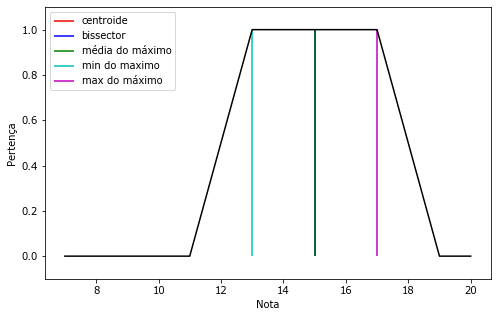

In [6]:
x = arange
mfx = mat_raz

# Defuzzificar esta função de pertença através de cinco formas
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # centróide
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')  # bissetor
defuzz_mom = fuzz.defuzz(x, mfx, 'mom') # média do máximo
defuzz_som = fuzz.defuzz(x, mfx, 'som') # mínimo do máximo
defuzz_lom = fuzz.defuzz(x, mfx, 'lom') # máximo do máximo

# Collect info for vertical lines
labels = ['centroide', 'bissector', 'média do máximo', 'min do maximo',
          'max do máximo']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Mostrar e comparar os resultados das 5 defuzzificações
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Pertença')
plt.xlabel('Nota')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

E qual é a nota de um bom matemático?

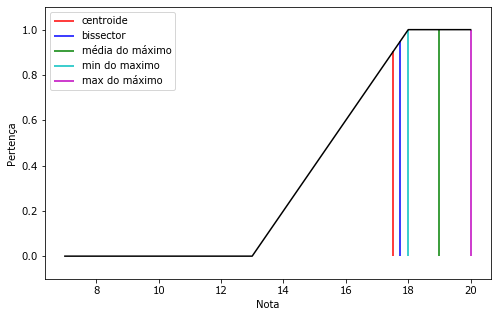

In [7]:
x = arange
mfx = mat_bom

# Defuzzify this membership function five ways
defuzz_centroid = fuzz.defuzz(x, mfx, 'centroid')  # Same as skfuzzy.centroid
defuzz_bisector = fuzz.defuzz(x, mfx, 'bisector')
defuzz_mom = fuzz.defuzz(x, mfx, 'mom')
defuzz_som = fuzz.defuzz(x, mfx, 'som')
defuzz_lom = fuzz.defuzz(x, mfx, 'lom')

# Collect info for vertical lines
labels = ['centroide', 'bissector', 'média do máximo', 'min do maximo',
          'max do máximo']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x, mfx, i) for i in xvals]

# Display and compare defuzzification results against membership function
plt.figure(figsize=(8, 5))

plt.plot(x, mfx, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Pertença')
plt.xlabel('Nota')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)

plt.show()

Queremos definir um salário para o aluno que tiver o melhor score?

Uma das regras para atribuir esse salário é: se o aluno for um bom ou razoável físico e for um bom matemático, então receberá um bom salário.

Receber um bom salário será também uma função de pertença cujo salário vai de 0 a 2000 euros, definida através de uma função de pertença trapezoidal, cuja pertença é 0 para salário(s) de 0 a 600, 0.0025(s)-1.5 para 600<s<1000 e 1 para s>1000.

Qual o salário a atribuir ao Pedro?

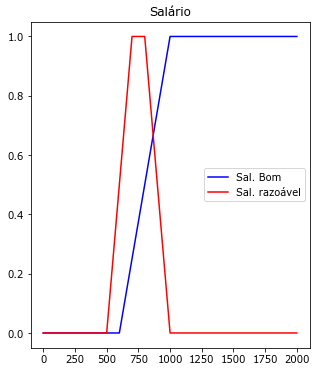

In [8]:
arange2 = np.arange(0,2100,100)
bom_salario = fuzz.trapmf(arange2,[600,1000,2000,2000])
salario_razoavel = fuzz.trapmf(arange2,[500,700,800,1000])

fig, ax2 = plt.subplots(nrows=1, figsize=(5,6))

ax2.plot(arange2, bom_salario, 'b', linewidth=1.5, label='Sal. Bom')
ax2.plot(arange2, salario_razoavel, 'r', linewidth=1.5, label='Sal. razoável')
ax2.set_title('Salário')
ax2.legend()

IF (Fis[razf] OR Fis[bomf]) AND Mat[bomm] THEN Salário[unic]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF Fis[razf] AND Mat[razm] THEN Salário[unic2]
	AND aggregation function : fmin
	OR aggregation function  : fmax


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c9f4718>)

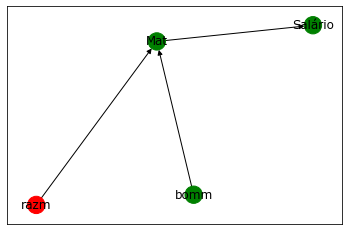

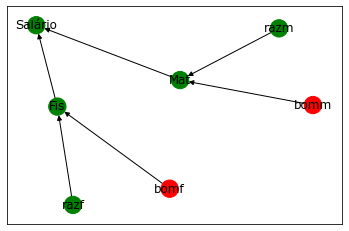

In [9]:
from skfuzzy import control as ctrl

ant1 = ctrl.Antecedent(arange,'Fis')
ant2 = ctrl.Antecedent(arange,'Mat')



con1 = ctrl.Consequent(arange2,'Salário')

ant1['razf'] = fuzz.trapmf(arange,[11,13,17,19])
ant2['razm'] = fuzz.trapmf(arange,[11,13,17,19])
ant1['bomf'] = fuzz.trapmf(arange,[13,18,20,20])
ant2['bomm'] = fuzz.trapmf(arange,[13,18,20,20])

con1['unic'] = fuzz.trapmf(arange2,[600,1000,2000,2000])
con1['unic2'] = fuzz.trapmf(arange2,[500,700,800,1000])

regra1 = ctrl.Rule((ant1['razf'] | ant1['bomf'])  & ant2['bomm'], con1['unic'])
regra2 = ctrl.Rule(ant1['razf'] & ant2['razm'], con1['unic2'])

print(regra1)
print(regra2)
regra1.view_n()
regra2.view_n()

In [10]:
salario_ctrl = ctrl.ControlSystem([regra1])

salario = ctrl.ControlSystemSimulation(salario_ctrl)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ca516a0>)

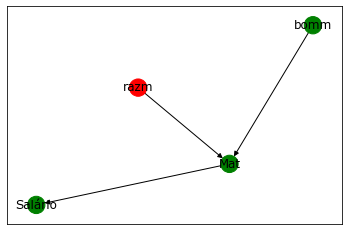

In [11]:
salario.input['Mat']=17
salario.input['Fis']=13

salario.compute()
regra1.view_n()

1376.5591397849464


c:\users\ricar\appdata\local\programs\python\python38-32\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


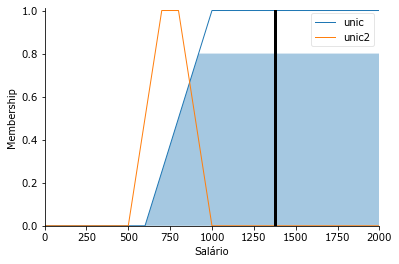

In [12]:
print (salario.output['Salário'])
con1.view(sim=salario) # Método Mandani method with centroid defuzzification

In [13]:
salario_ctrl = ctrl.ControlSystem([regra1,regra2])

salario = ctrl.ControlSystemSimulation(salario_ctrl)

In [14]:
salario.input['Mat']=14
salario.input['Fis']=19

salario.compute()

1319.8039215686276


c:\users\ricar\appdata\local\programs\python\python38-32\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


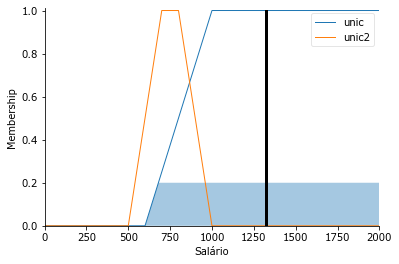

In [15]:
print (salario.output['Salário'])
con1.view(sim=salario) # Método Mandani method with centroid defuzzification

In [16]:
upsampled = np.linspace(7, 20, 14) # Criar as 14 notas possíveis para os alunos
x, y = np.meshgrid(upsampled, upsampled)
z = np.zeros_like(x)

salario.input['Mat']=13
salario.input['Fis']=12

salario.compute()

In [17]:
# Ciclo para a superfície de controle usando 14*14 inputs diferentes
# Como não temos regras para todos os cenários, temos de ajustar os valores
for i in range(14):
    for j in range(14):
        salario.input['Mat'] = x[i, j]
        salario.input['Fis'] = y[i, j]
        if (x[i, j]>13 and y[i,j]>11):
            salario.compute()
            z[i, j] = salario.output['Salário']
        elif (11<x[i, j]<14 and 11<y[i,j]<18):
            salario.compute()
            z[i, j] = salario.output['Salário']
print(z)

[[   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
     0.            0.            0.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            0.            0.            0.            0.
 

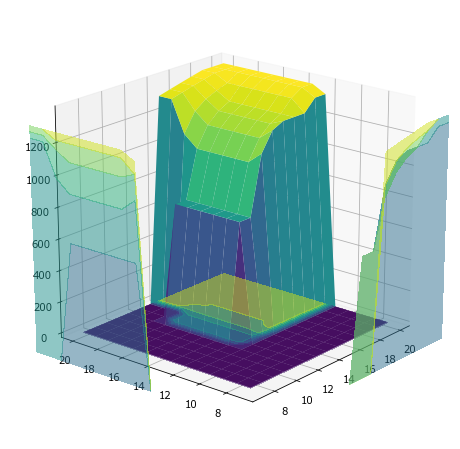

In [18]:
# Fazer o plot num 3D com alpha blending
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis',
                       linewidth=0.4, antialiased=True)

cset = ax.contourf(x, y, z, zdir='z', offset=-2.5, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset=3, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset=3, cmap='viridis', alpha=0.5)

ax.view_init(20, 220)